<a href="https://colab.research.google.com/github/brrikcy/machine-learning/blob/main/ML_EXP_8_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gaussian Naive Bayes**

**Importing dataset and preprocessing**

In [ ]:
#importing pandas
import pandas as pd
#reading data
data=pd.read_csv('/content/drive/MyDrive/DATASETS/Naive-Bayes-Gaussian.csv')
#dropping duplicates
data.drop_duplicates(inplace=True)
#dropping rows with missing values
data.dropna(inplace=True)
#displaying data
data

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
...,...,...,...
873,20,73,1
914,55,87,0
953,40,75,0
955,45,50,1


Normalization

In [ ]:
#importing minmaxscaler
from sklearn.preprocessing import MinMaxScaler
#instantiating scaler
scaler=MinMaxScaler()
#performing normalization
scaler.fit_transform(data)

array([[0.4 , 0.7 , 0.  ],
       [0.4 , 0.84, 0.  ],
       [0.5 , 0.26, 1.  ],
       [0.5 , 0.6 , 0.  ],
       [0.4 , 0.46, 1.  ],
       [0.5 , 0.64, 0.  ],
       [0.2 , 0.26, 1.  ],
       [0.9 , 0.3 , 1.  ],
       [0.3 , 0.46, 1.  ],
       [0.5 , 0.8 , 0.  ],
       [0.6 , 0.36, 1.  ],
       [0.4 , 0.86, 0.  ],
       [0.3 , 0.6 , 1.  ],
       [0.6 , 0.4 , 1.  ],
       [0.4 , 0.34, 1.  ],
       [0.4 , 0.5 , 1.  ],
       [0.4 , 0.6 , 1.  ],
       [0.4 , 0.44, 1.  ],
       [0.4 , 0.76, 0.  ],
       [0.4 , 0.56, 1.  ],
       [0.5 , 0.96, 0.  ],
       [0.8 , 0.34, 1.  ],
       [0.5 , 0.56, 0.  ],
       [0.7 , 0.46, 1.  ],
       [0.5 , 0.54, 1.  ],
       [0.5 , 0.4 , 1.  ],
       [0.5 , 0.44, 1.  ],
       [0.4 , 0.3 , 1.  ],
       [0.5 , 0.76, 0.  ],
       [0.4 , 0.36, 1.  ],
       [0.5 , 0.7 , 0.  ],
       [0.4 , 0.66, 0.  ],
       [0.4 , 0.26, 1.  ],
       [0.5 , 0.46, 1.  ],
       [0.5 , 0.74, 0.  ],
       [0.4 , 0.8 , 0.  ],
       [0.5 , 0.86, 0.  ],
 

**Splitting dependent and independent data**

In [ ]:
#independent features
X=data.drop(columns=['diabetes'])
#dependent features
y=data['diabetes']

Plotting the data values

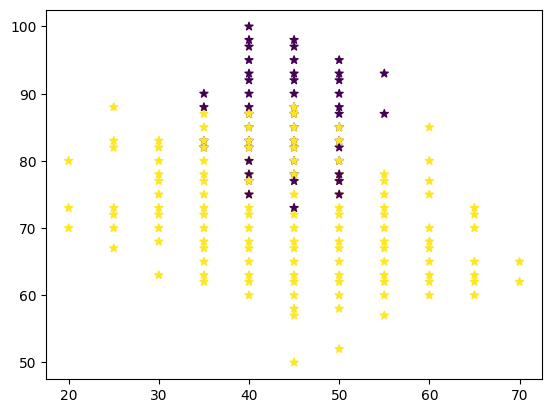

In [ ]:
#importing matplotlib
import matplotlib.pyplot as plt
#plotting dataset
plt.scatter(X['glucose'],X['bloodpressure'],c=y,marker="*")

**Train test split**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=43)

**Training the model**

In [ ]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()
model.fit(x_train,y_train)
predicted=model.predict(x_test)

**Testing the model**

In [ ]:
from sklearn.metrics import (accuracy_score,confusion_matrix,ConfusionMatrixDisplay,f1_score,classification_report)
y_pred=model.predict(x_test)
from sklearn.metrics import classification_report
#displaying classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73        10
           1       0.91      0.84      0.87        25

    accuracy                           0.83        35
   macro avg       0.79      0.82      0.80        35
weighted avg       0.84      0.83      0.83        35



**Confusion Matrix**

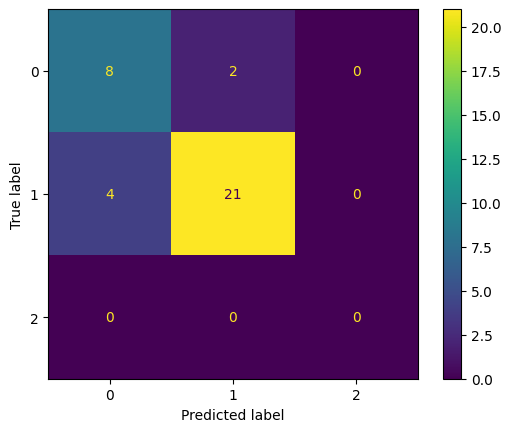

In [ ]:
labels=[0,1,2]
cm=confusion_matrix(y_test,y_pred,labels=labels)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()

# **Multinomial Naive Bayes**

**Importing and preprocessing dataset**

In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/DATASETS/email_classification.csv')
data

,email,label
0,Upgrade to our premium plan for exclusive acce...,ham
1,Happy holidays from our team! Wishing you joy ...,ham
2,We're hiring! Check out our career opportuniti...,ham
3,Your Amazon account has been locked. Click her...,spam
4,Your opinion matters! Take our survey and help...,ham
...,...,...
174,We're pleased to inform you that your refund h...,ham
175,Get rich quick! Invest in our revolutionary ne...,spam
176,Your free trial period is ending soon. Upgrade...,ham
177,Your order is on its way! Track your shipment ...,ham


Handling duplicates and missing values

In [ ]:
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['label']=encoder.fit_transform(data['label'])

Train test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data['email'],data['label'],test_size=0.2,random_state=42)

Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
vectorizer.fit(data['email'])
x_train_vect=vectorizer.transform(x_train)
x_test_vect=vectorizer.transform(x_test)

**Training the model**

In [ ]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train_vect,y_train)

MultinomialNB()

**Testing the model**

In [ ]:
from sklearn.metrics import (accuracy_score,confusion_matrix,ConfusionMatrixDisplay,f1_score,classification_report)
y_pred=model.predict(x_test_vect)
from sklearn.metrics import classification_report
#displaying classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.94      1.00      0.97        15

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



**Confusion Matrix**

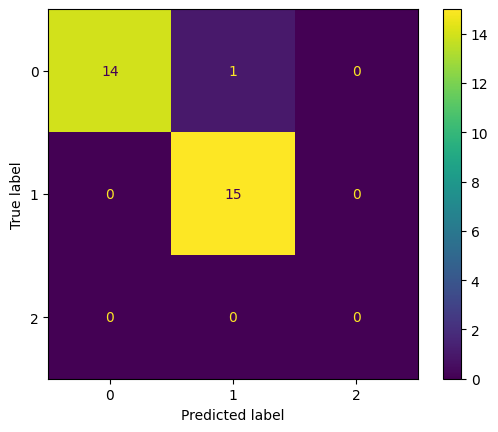

In [ ]:
labels=[0,1,2]
cm=confusion_matrix(y_test,y_pred,labels=labels)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()

# **Bernoulli Naive Bayes**

**Importing Dataset**

In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/DATASETS/spam_dataset.csv')
data

,SubjectLine_ContainsSpamWords,HasAttachment,SenderUnknown,BodyContainsUrls,Spam
0,1,1,0,1,0
1,0,0,0,1,0
2,0,0,0,1,1
3,1,1,0,0,1
4,1,0,0,1,0
...,...,...,...,...,...
495,0,1,0,0,1
496,1,0,0,0,1
497,0,1,1,1,0
498,1,0,0,0,0


**Data Preprocessing**

In [ ]:
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)

**Splitting data**

In [ ]:
x=data.drop(columns=['Spam'])
y=data['Spam']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

**Training Model**

In [ ]:
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB()
model.fit(x_train,y_train)

BernoulliNB()

**Testing the model**

In [ ]:
from sklearn.metrics import (accuracy_score,confusion_matrix,ConfusionMatrixDisplay,f1_score,classification_report)
y_pred=model.predict(x_test)
from sklearn.metrics import classification_report
#displaying classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.80      0.89         5

    accuracy                           0.83         6
   macro avg       0.75      0.90      0.78         6
weighted avg       0.92      0.83      0.85         6



**Confusion Matrix**

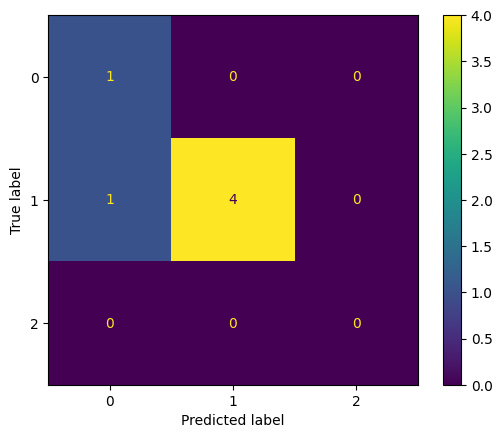

In [ ]:
labels=[0,1,2]
cm=confusion_matrix(y_test,y_pred,labels=labels)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()

# **Complement Naive Bayes**

**Importing Dataset**

In [ ]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/DATASETS/compliment_dataset.csv')
data

,Text,Class
0,Thanks for the coffee!,0
1,Can you pass the salt?,0
2,I finished that project you assigned.,0
3,Thanks for the coffee!,0
4,The traffic is a nightmare this morning.,0
...,...,...
1495,Thanks for the coffee!,0
1496,This weather is terrible today.,0
1497,Thanks for the coffee!,0
1498,I finished that project you assigned.,0


**Data Preprocessing**

In [ ]:
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data.shape
data

,Text,Class
0,Thanks for the coffee!,0
1,Can you pass the salt?,0
2,I finished that project you assigned.,0
4,The traffic is a nightmare this morning.,0
6,I need to get some groceries.,0
...,...,...
1463,I love your pleasant magnificent!,1
1467,That great idea was marvelous!,1
1472,Your elegant work is truly generous.,1
1476,That polite idea was creative!,1


**Splitting Dataset**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data['Text'],data['Class'],test_size=0.2,random_state=42)

Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
vectorizer.fit(data['Text'])
x_train_vect=vectorizer.transform(x_train)
x_test_vect=vectorizer.transform(x_test)

**Training the Model**

In [ ]:
from sklearn.naive_bayes import ComplementNB
model=ComplementNB()
model.fit(x_train_vect,y_train)

ComplementNB()

**Testing the Model**

In [ ]:
from sklearn.metrics import (accuracy_score,confusion_matrix,ConfusionMatrixDisplay,f1_score,classification_report)
y_pred=model.predict(x_test_vect)
from sklearn.metrics import classification_report
#displaying classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00        68

    accuracy                           1.00        70
   macro avg       1.00      1.00      1.00        70
weighted avg       1.00      1.00      1.00        70



**Confusion Matrix**

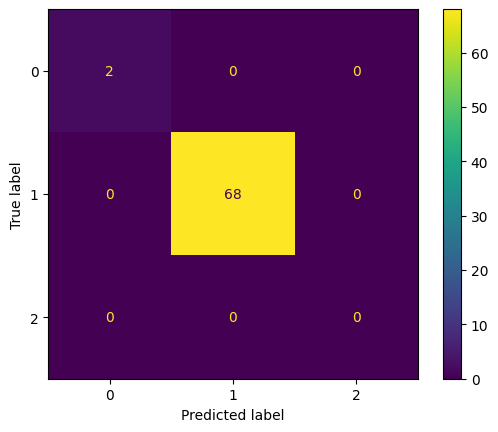

In [ ]:
labels=[0,1]
cm=confusion_matrix(y_test,y_pred,labels=labels)
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()